# EDA Heart WorkShop porject Yandex Practicum

## Описание

**Описание проекта**



**Входные признаки**:

- **id**: Уникальный идентификатор пациента.  
- **Blood sugar**: Уровень глюкозы в крови (ммоль/л или мг/дл). Может указывать на предрасположенность к диабету, что влияет на сердечное здоровье. 
- **Alcohol Consumption**: Уровень потребления алкоголя.  
- **Medication Use**: Приём лекарств, влияющих на сердечно-сосудистую систему.  
- **Triglycerides**: Уровень триглицеридов в крови (мг/дл) — важный маркер липидного обмена.  
- **Stress Level**: Уровень стресса (по шкале от 1 до 10). Хронический стресс связан с риском сердечных заболеваний.  
- **Unnamed: 0**: Служебный столбец — старый индекс, оставшийся после загрузки датасета. Подлежит удалению.  
- **Gender**: Пол пациента (мужской / женский).  
- **Systolic blood pressure**: Систолическое артериальное давление.  
- **Sleep Hours Per Day**: Количество часов сна в сутки. Недостаток или избыток сна могут повышать риск.  
- **Physical Activity Days Per Week**: Количество дней в неделю, когда человек занимается физической активностью (от 0 до 7).  
- **Diet**: Тип питания (от 0 до 3).  
- **BMI**: Индекс массы тела (кг/м²). Используется для оценки избыточного веса и ожирения.  
- **Diabetes**: Наличие диабета.  
- **Exercise Hours Per Week**: Общее количество часов физических упражнений в неделю.  
- **Income**: Уровень дохода. Социально-экономический фактор, влияющий на доступ к здравоохранению и образ жизни.  
- **Family History**: Наследственность — наличие сердечных заболеваний у близких родственников.  
- **Smoking**: Курение.  
- **CK-MB**: Уровень креатинкиназы-MB (мкг/л) — фермент, повышающийся при повреждении сердечной мышцы.  
- **Heart rate**: Частота сердечных сокращений.  
- **Diastolic blood pressure**: Диастолическое артериальное давление.  
- **Cholesterol**: Уровень общего холестерина в крови (мг/дл).  
- **Obesity**: Ожирение может быть выведено из BMI.  
- **Troponin**: Уровень тропонина (нг/мл) — ключевой биомаркер повреждения миокарда.  
- **Age**: Возраст пациента (в годах). Один из значимых факторов риска.  
- **Sedentary Hours Per Day**: Количество часов в день, проведённых в сидячем образе жизни.  
- **Previous Heart Problems**: Наличие ранее диагностированных сердечных проблем (например, инфаркт, аритмия и т.д.).

**Целевой признак**:

- **Heart Attack Risk (Binary)**: Риск сердечного приступа (0 — низкий риск, 1 — высокий риск). Бинарная переменная, используемая для классификации.

## 0 Подготовка библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import phik
from phik.report import plot_correlation_matrix
import warnings
warnings.filterwarnings("ignore")

# Models 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler, 
    MinMaxScaler,
    FunctionTransformer
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    ConfusionMatrixDisplay,
    confusion_matrix
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import shap, joblib

# library setups
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

sns.set()

## 1 Загрузка данных

In [2]:
df_heart = pd.read_csv('heart_train.csv')
df_heart_test = pd.read_csv('heart_test.csv')

df_dict = {
    'df_heart' : df_heart,
    'df_heart_test' : df_heart_test
}

In [3]:
for name, df in df_dict.items():
    print('\n', name.center(70, '-'))
    display(df.head())


 -------------------------------df_heart-------------------------------


,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
0,0,0.359551,0.732143,0.074244,1.0,1.0,1.0,1.0,1.0,0.535505,1,1.0,0.0,8.0,0.225704,0.105948,0.459176,0.979221,3.0,0.333333,0.0,0.227018,0.048229,0.036512,Male,0.212903,0.709302,2664
1,1,0.202247,0.325000,0.047663,1.0,1.0,0.0,0.0,1.0,0.068690,2,1.0,0.0,9.0,0.289923,0.164217,0.117053,0.515584,3.0,0.833333,0.0,0.150198,0.017616,0.000194,Female,0.412903,0.569767,9287
2,2,0.606742,0.860714,0.055912,1.0,0.0,1.0,1.0,1.0,0.944001,2,1.0,1.0,6.0,0.550133,0.598745,0.373574,0.012987,2.0,1.000000,0.0,0.227018,0.048229,0.036512,Female,0.238710,0.220930,5379
3,3,0.730337,0.007143,0.053162,0.0,0.0,1.0,0.0,1.0,0.697023,0,0.0,1.0,3.0,0.330962,0.077605,0.049735,0.131169,0.0,0.333333,1.0,0.227018,0.048229,0.036512,Female,0.348387,0.267442,8222
4,4,0.775281,0.757143,0.021998,0.0,0.0,1.0,0.0,1.0,0.412878,1,0.0,0.0,8.0,0.524600,0.341960,0.830405,0.070130,5.0,1.000000,1.0,0.227018,0.048229,0.036512,Male,0.619355,0.441860,4047



 ----------------------------df_heart_test-----------------------------


,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
0,0,0.494382,0.264286,0.062328,0.0,1.0,1.0,1.0,1.0,0.361618,2,0.0,0.0,8.0,0.194370,0.587759,0.283490,0.306494,1.0,0.333333,0.227018,0.048229,0.036512,Male,0.283871,0.372093,7746
1,1,0.224719,0.953571,0.082493,1.0,0.0,0.0,1.0,0.0,0.996483,2,1.0,1.0,5.0,0.329888,0.602883,0.467036,0.087013,0.0,0.166667,0.227018,0.048229,0.036512,Female,0.703226,0.441860,4202
2,2,0.629213,0.092857,0.064161,0.0,1.0,1.0,1.0,0.0,0.995561,0,0.0,0.0,10.0,0.780075,0.370436,0.409366,0.205195,7.0,1.000000,0.102767,0.002666,0.088455,Male,0.458065,0.779070,6632
3,3,0.460674,0.567857,0.055912,1.0,1.0,1.0,1.0,1.0,0.437277,0,0.0,0.0,10.0,0.785071,0.368242,0.910261,0.163636,0.0,0.666667,0.203557,0.056390,0.271774,Female,0.741935,0.255814,4639
4,4,0.719101,0.485714,0.022915,1.0,0.0,1.0,0.0,1.0,0.514920,0,0.0,0.0,7.0,0.070919,0.729578,0.758924,0.580519,5.0,0.000000,0.227018,0.048229,0.036512,Male,0.412903,0.395349,4825


In [4]:
for name, df in df_dict.items():
    print(name.center(60, '-'))
    df.info()
    display(df.nunique())
    print()

--------------------------df_heart--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       8685 non-null   int64  
 1   Age                              8685 non-null   float64
 2   Cholesterol                      8685 non-null   float64
 3   Heart rate                       8685 non-null   float64
 4   Diabetes                         8442 non-null   float64
 5   Family History                   8442 non-null   float64
 6   Smoking                          8442 non-null   float64
 7   Obesity                          8442 non-null   float64
 8   Alcohol Consumption              8442 non-null   float64
 9   Exercise Hours Per Week          8685 non-null   float64
 10  Diet                             8685 non-null   int64  
 11  Previous Heart Proble

Unnamed: 0                         8685
Age                                  77
Cholesterol                         282
Heart rate                           87
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            7933
Diet                                  4
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            7933
Income                             7808
BMI                                7933
Triglycerides                       772
Physical Activity Days Per Week       8
Sleep Hours Per Day                   8
Heart Attack Risk (Binary)            2
Blood sugar                         239
CK-MB                               679
Troponin                            340
Gender                                4



-----------------------df_heart_test------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       966 non-null    int64  
 1   Age                              966 non-null    float64
 2   Cholesterol                      966 non-null    float64
 3   Heart rate                       966 non-null    float64
 4   Diabetes                         935 non-null    float64
 5   Family History                   935 non-null    float64
 6   Smoking                          935 non-null    float64
 7   Obesity                          935 non-null    float64
 8   Alcohol Consumption              935 non-null    float64
 9   Exercise Hours Per Week          966 non-null    float64
 10  Diet                             966 non-null    int64  
 11  Previous Heart Problem

Unnamed: 0                         966
Age                                 73
Cholesterol                        266
Heart rate                          76
Diabetes                             2
Family History                       2
Smoking                              2
Obesity                              2
Alcohol Consumption                  2
Exercise Hours Per Week            924
Diet                                 4
Previous Heart Problems              2
Medication Use                       2
Stress Level                        10
Sedentary Hours Per Day            924
Income                             921
BMI                                924
Triglycerides                      529
Physical Activity Days Per Week      8
Sleep Hours Per Day                  8
Blood sugar                        124
CK-MB                              183
Troponin                            96
Gender                               4
Systolic blood pressure             93
Diastolic blood pressure 

**Вывод по блоку:**
- Таблица с тренировочной выборкой состоит из 8685 строк и 27 столбцов.  
- Имеются пропуски в 9 столбцах.  

## 2 Предобработка данных

In [5]:
def exploratory_analysis(df):
    '''Функция для быстрого разведочного анализа'''
    print('Exploratory Analysis'.center(60, '-'), '\n')
    display(df.info())
    print(''.center(60,'-'), '\n')
    print(f'Number of duplicates: {df.duplicated().sum()}')
    print(''.center(60,'-'), '\n')
    if 'id' in df.columns:
        id_duplicates = df['id'].duplicated().sum()
        if id_duplicates > 0:
            print(f'Количество дубликатов для столбца id: {id_duplicates}')
        else:
            print(f'Дубликатов в столбце id не обнаружено')
    print(''.center(60,'-'), '\n')
    miss_value = df[df[df.columns[df.isnull().any()].tolist()].isnull().any(axis=1)].shape[0]
    percent = miss_value/len(df)
    print(f'Количество пропусков: {miss_value} ({percent:.2%})')
    print(''.center(60,'-'), '\n')

In [6]:
def set_column_to_text(column):
    '''Функция для вывода нормального названия заголовков у графиков'''
    return column.replace('_', ' ').title()

In [7]:
def histogram_num_analysis(df, column):
    '''Функция для построения отдельного '''
    plt.figure(figsize=(7, 7))
    sns.histplot(data=df[column], kde=True)

    column = set_column_to_text(column)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column);
    plt.show()

In [8]:
def df_style(df, format_value = '{:.0f}', axis = 1):
    '''Функция для стилизации датафрейма'''
    df = (
        df
        .style
        .format(format_value, na_rep=' ')
        .highlight_max(color = 'springgreen', axis = axis)
        .highlight_min(color = 'yellow', axis = axis)
        .highlight_null(color = 'white')
    )
    display(df)

In [9]:
def rename_columns(df):
    '''Функция для изменения названия колонок'''
    old_title_list = df.columns.to_list()
    new_title_list = []
    for title in old_title_list:
        title = (title.lower()
                    .replace(' ', '_')
                    .replace('-', '_')
                    .replace('(', '')
                    .replace(')', '')
                    .replace('__', '_')
                    .strip('_'))
        new_title_list.append(title)

    title_dict = {}
    for i in range(len(old_title_list)):
        title_dict[old_title_list[i]] = new_title_list[i]
    df.rename(columns = title_dict, inplace = True)
    print(f'The column names have been changed!')

In [10]:
for name, df in df_dict.items():
    print('\n', name.center(60, ' '))
    exploratory_analysis(df)


                           df_heart                          
--------------------Exploratory Analysis-------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       8685 non-null   int64  
 1   Age                              8685 non-null   float64
 2   Cholesterol                      8685 non-null   float64
 3   Heart rate                       8685 non-null   float64
 4   Diabetes                         8442 non-null   float64
 5   Family History                   8442 non-null   float64
 6   Smoking                          8442 non-null   float64
 7   Obesity                          8442 non-null   float64
 8   Alcohol Consumption              8442 non-null   float64
 9   Exercise Hours Per Week          8685 non-null   float64
 10  Diet              

None

------------------------------------------------------------ 

Number of duplicates: 0
------------------------------------------------------------ 

Дубликатов в столбце id не обнаружено
------------------------------------------------------------ 

Количество пропусков: 243 (2.80%)
------------------------------------------------------------ 


                        df_heart_test                        
--------------------Exploratory Analysis-------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       966 non-null    int64  
 1   Age                              966 non-null    float64
 2   Cholesterol                      966 non-null    float64
 3   Heart rate                       966 non-null    float64
 4   Diabetes                         935 non-nul

None

------------------------------------------------------------ 

Number of duplicates: 0
------------------------------------------------------------ 

Дубликатов в столбце id не обнаружено
------------------------------------------------------------ 

Количество пропусков: 31 (3.21%)
------------------------------------------------------------ 



In [11]:
for name, df in df_dict.items():
    print('\n', name.center(60, ' '))
    rename_columns(df)


                           df_heart                          
The column names have been changed!

                        df_heart_test                        
The column names have been changed!


In [12]:
df_heart.dropna(inplace = True)

In [13]:
for name, df in df_dict.items(): 
    df.drop('unnamed:_0', axis = 1, inplace = True) #Удаляем служебный столбец
    print('\n', name.center(60, ' '))
    exploratory_analysis(df)


                           df_heart                          
--------------------Exploratory Analysis-------------------- 

<class 'pandas.core.frame.DataFrame'>
Index: 8442 entries, 0 to 8684
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              8442 non-null   float64
 1   cholesterol                      8442 non-null   float64
 2   heart_rate                       8442 non-null   float64
 3   diabetes                         8442 non-null   float64
 4   family_history                   8442 non-null   float64
 5   smoking                          8442 non-null   float64
 6   obesity                          8442 non-null   float64
 7   alcohol_consumption              8442 non-null   float64
 8   exercise_hours_per_week          8442 non-null   float64
 9   diet                             8442 non-null   int64  
 10  previous_heart_problems

None

------------------------------------------------------------ 

Number of duplicates: 0
------------------------------------------------------------ 

Дубликатов в столбце id не обнаружено
------------------------------------------------------------ 

Количество пропусков: 0 (0.00%)
------------------------------------------------------------ 


                        df_heart_test                        
--------------------Exploratory Analysis-------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              966 non-null    float64
 1   cholesterol                      966 non-null    float64
 2   heart_rate                       966 non-null    float64
 3   diabetes                         935 non-null    float64
 4   family_history                   935 non-null 

None

------------------------------------------------------------ 

Number of duplicates: 0
------------------------------------------------------------ 

Дубликатов в столбце id не обнаружено
------------------------------------------------------------ 

Количество пропусков: 31 (3.21%)
------------------------------------------------------------ 



**Вывод по блоку:**
- Были переимнованы колонки под стиль ``snake_case``
- Данные в большинстве числовых признаков (например: Age, Cholesterol, Heart rate) выглядят масштабированными в диапазон `[0, 1]`.  
- Удалён столбец ``Unnamed: 0``
- Удалины пропуски из df_heart (тренировочная выборка)

### 3 EDA

In [14]:
def describe_df(df, hue = None):
    # Код для описание категориальных признаков
    for column in df.select_dtypes(exclude = 'number').columns.to_list():
        print(column.center(60, '-'))
        if len(df[column].unique().tolist()) > 50:
            print(f'More unique values than 50: {len(df[column].unique().tolist())}')    
        else:
            display(df[column].unique().tolist())
            display(df[column].value_counts())
    
    ## Описание данных
    df_style(df.describe().T, format_value = '{:.4f}', axis = 0)
    
    # Код для построения гистограмм для количественных признаков и частично категориальных
    fig = plt.figure(figsize = (17, 35))
    for i, column in enumerate(df.select_dtypes(include = 'number').columns.tolist()):
        ax = fig.add_subplot(7, 4, i+1);

        if len(df[column].unique()) > 3:
            sns.histplot(df, x = column, hue = hue, kde = True)
            column = set_column_to_text(column)
            plt.title(f'Histogram for {column}')
            plt.xlabel(column);
            plt.ylabel('Count')
            plt.tight_layout();
        else:
            sns.countplot(df, x = column, hue = hue)
            column = set_column_to_text(column)
            plt.title(f'Histogram for {column}')
            plt.xlabel(column);
            plt.ylabel('Count')
            plt.tight_layout();

    plt.show()
    
    ## Описание значений с пропусками
    print()
    print('Описательная таблица с пропусками')
    for column in df.columns.tolist():
        if sum(df[column].isna()) > 0:
            print(f'Количество пропусков в столбце {set_column_to_text(column)}: {sum(df[column].isna())}', '\n')

---------------------------gender---------------------------


['Male', 'Female']

gender
Male      5882
Female    2560
Name: count, dtype: int64

,count,mean,std,min,25%,50%,75%,max
age,8442.0000,0.4490,0.2328,0.0449,0.2472,0.4607,0.6404,0.8539
cholesterol,8442.0000,0.5011,0.2888,0.0000,0.2607,0.4964,0.7500,1.0000
heart_rate,8442.0000,0.0502,0.0184,0.0183,0.0348,0.0504,0.0660,0.0825
diabetes,8442.0000,0.6521,0.4763,0.0000,0.0000,1.0000,1.0000,1.0000
family_history,8442.0000,0.4896,0.4999,0.0000,0.0000,0.0000,1.0000,1.0000
smoking,8442.0000,0.9029,0.2962,0.0000,1.0000,1.0000,1.0000,1.0000
obesity,8442.0000,0.4983,0.5000,0.0000,0.0000,0.0000,1.0000,1.0000
alcohol_consumption,8442.0000,0.6020,0.4895,0.0000,0.0000,1.0000,1.0000,1.0000
exercise_hours_per_week,8442.0000,0.5034,0.2889,0.0000,0.2534,0.5082,0.7549,1.0000
diet,8442.0000,1.0015,0.8130,0.0000,0.0000,1.0000,2.0000,2.0000


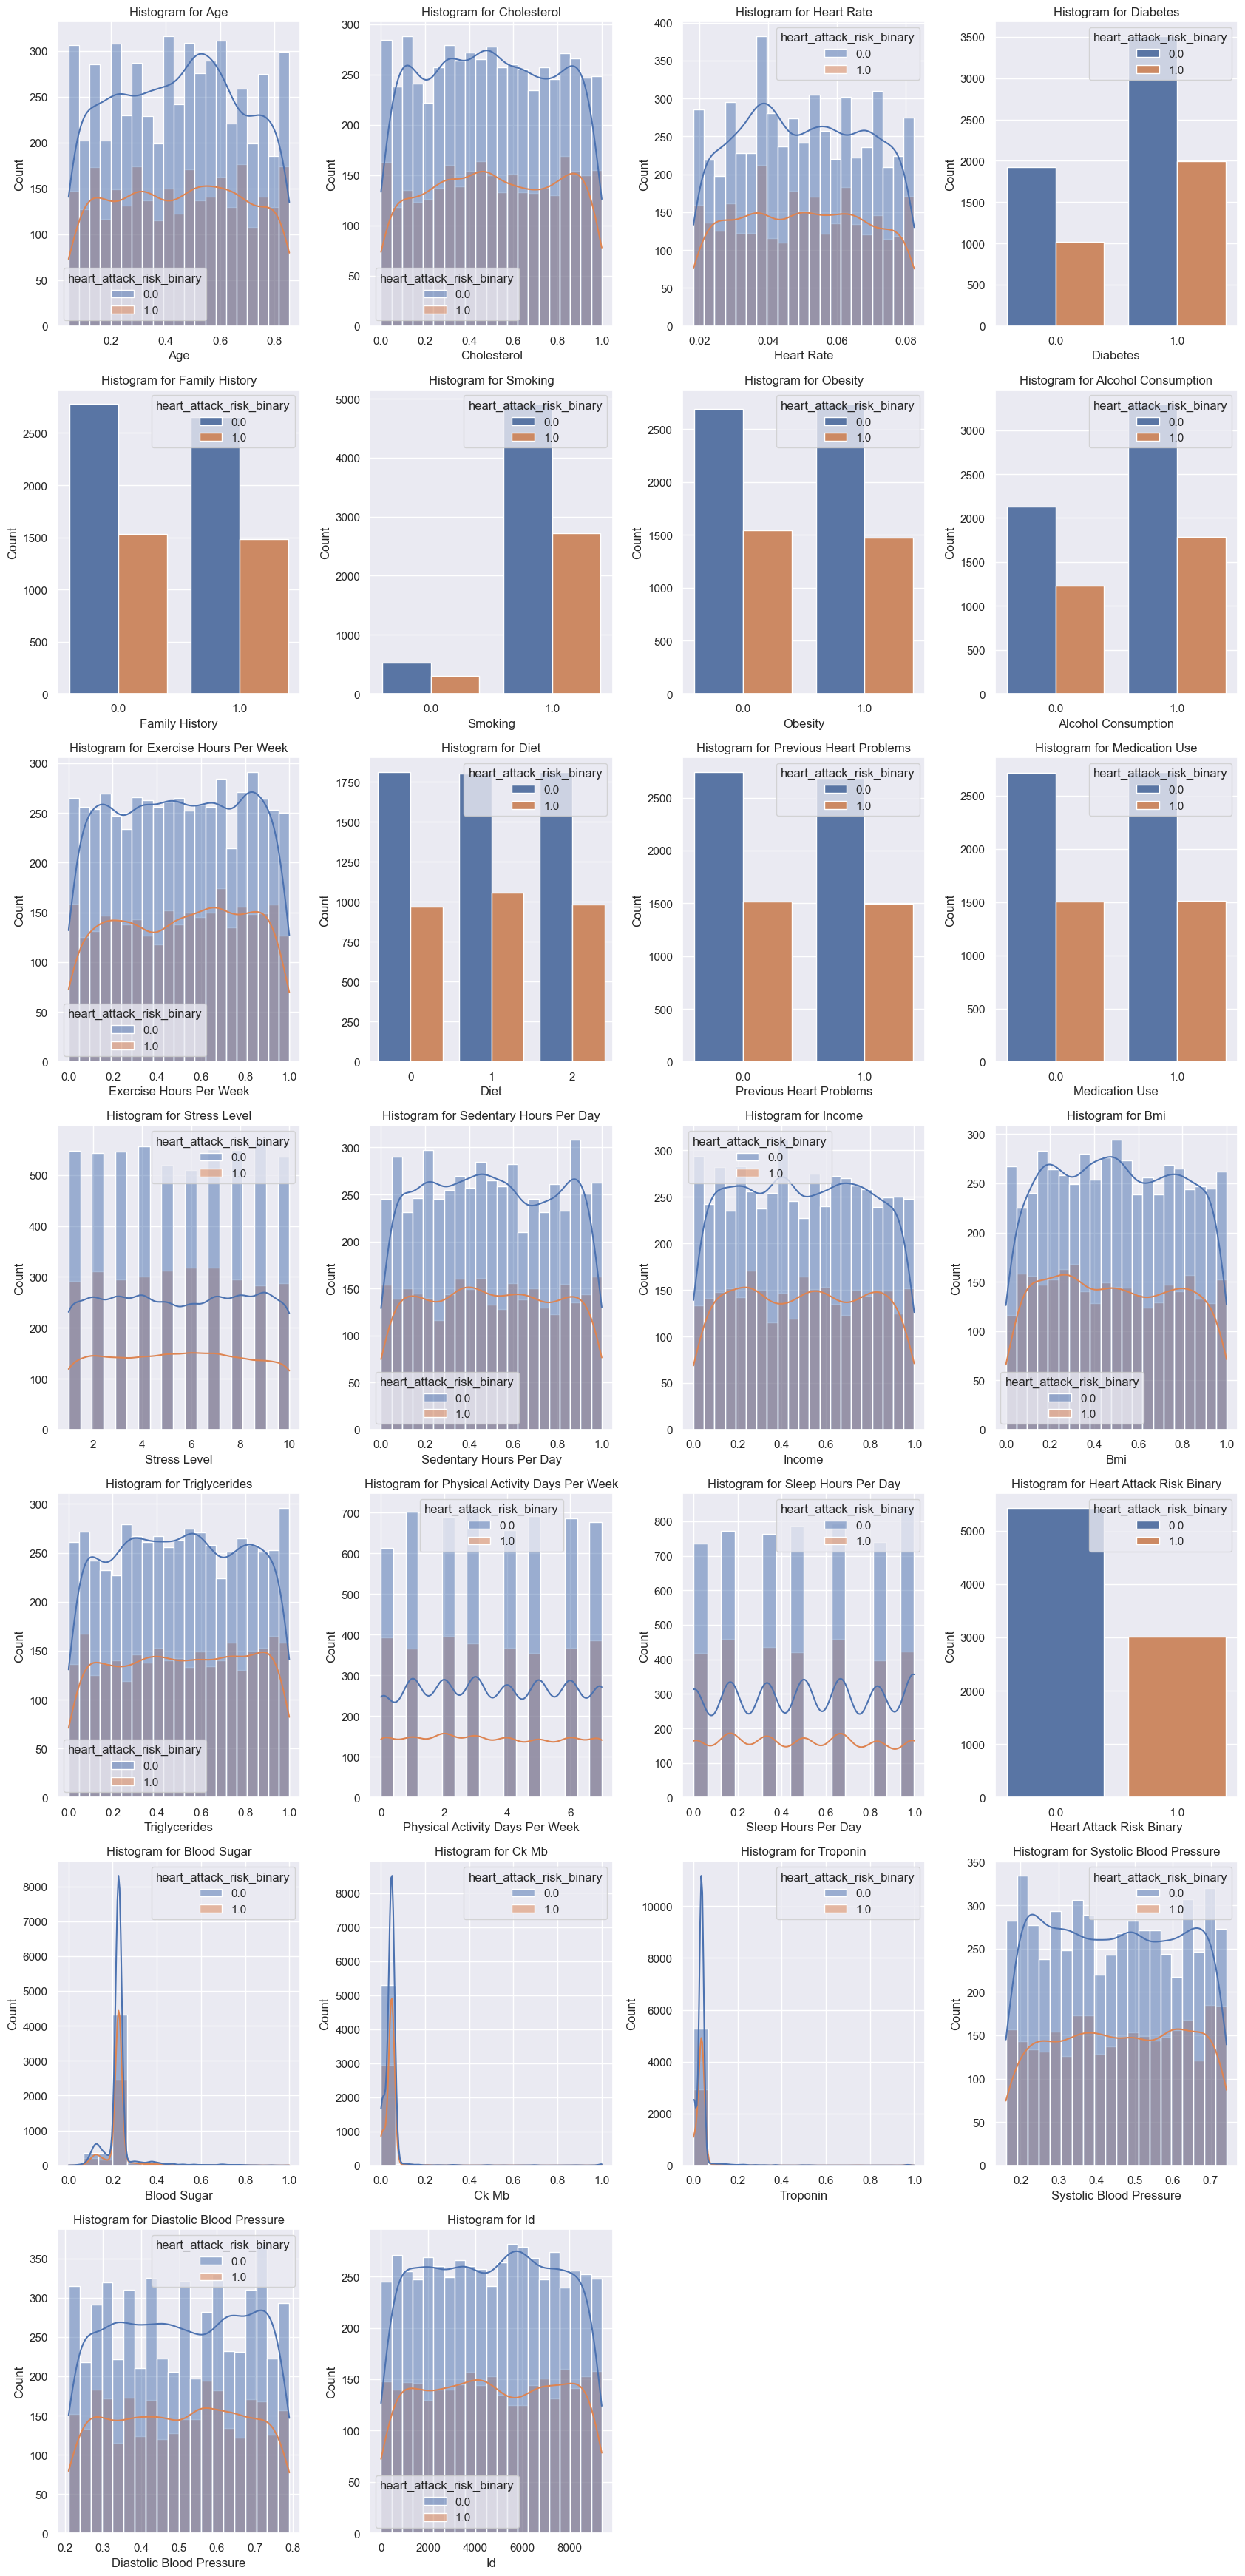


Описательная таблица с пропусками


In [15]:
describe_df(df_heart, hue = 'heart_attack_risk_binary')

---------------------------gender---------------------------


['Male', 'Female', '1.0', '0.0']

gender
Male      650
Female    285
1.0        22
0.0         9
Name: count, dtype: int64

,count,mean,std,min,25%,50%,75%,max
age,966.0000,0.4529,0.2311,0.0449,0.2472,0.4607,0.6404,0.8539
cholesterol,966.0000,0.4882,0.2820,0.0000,0.2437,0.4998,0.7107,0.9964
heart_rate,966.0000,0.0516,0.0355,0.0000,0.0367,0.0504,0.0660,1.0000
diabetes,935.0000,0.6567,0.4751,0.0000,0.0000,1.0000,1.0000,1.0000
family_history,935.0000,0.4813,0.4999,0.0000,0.0000,0.0000,1.0000,1.0000
smoking,935.0000,0.8984,0.3023,0.0000,1.0000,1.0000,1.0000,1.0000
obesity,935.0000,0.5166,0.5000,0.0000,0.0000,1.0000,1.0000,1.0000
alcohol_consumption,935.0000,0.5840,0.4932,0.0000,0.0000,1.0000,1.0000,1.0000
exercise_hours_per_week,966.0000,0.4907,0.2849,0.0003,0.2434,0.5021,0.7344,0.9989
diet,966.0000,1.0538,0.8846,0.0000,0.0000,1.0000,2.0000,3.0000


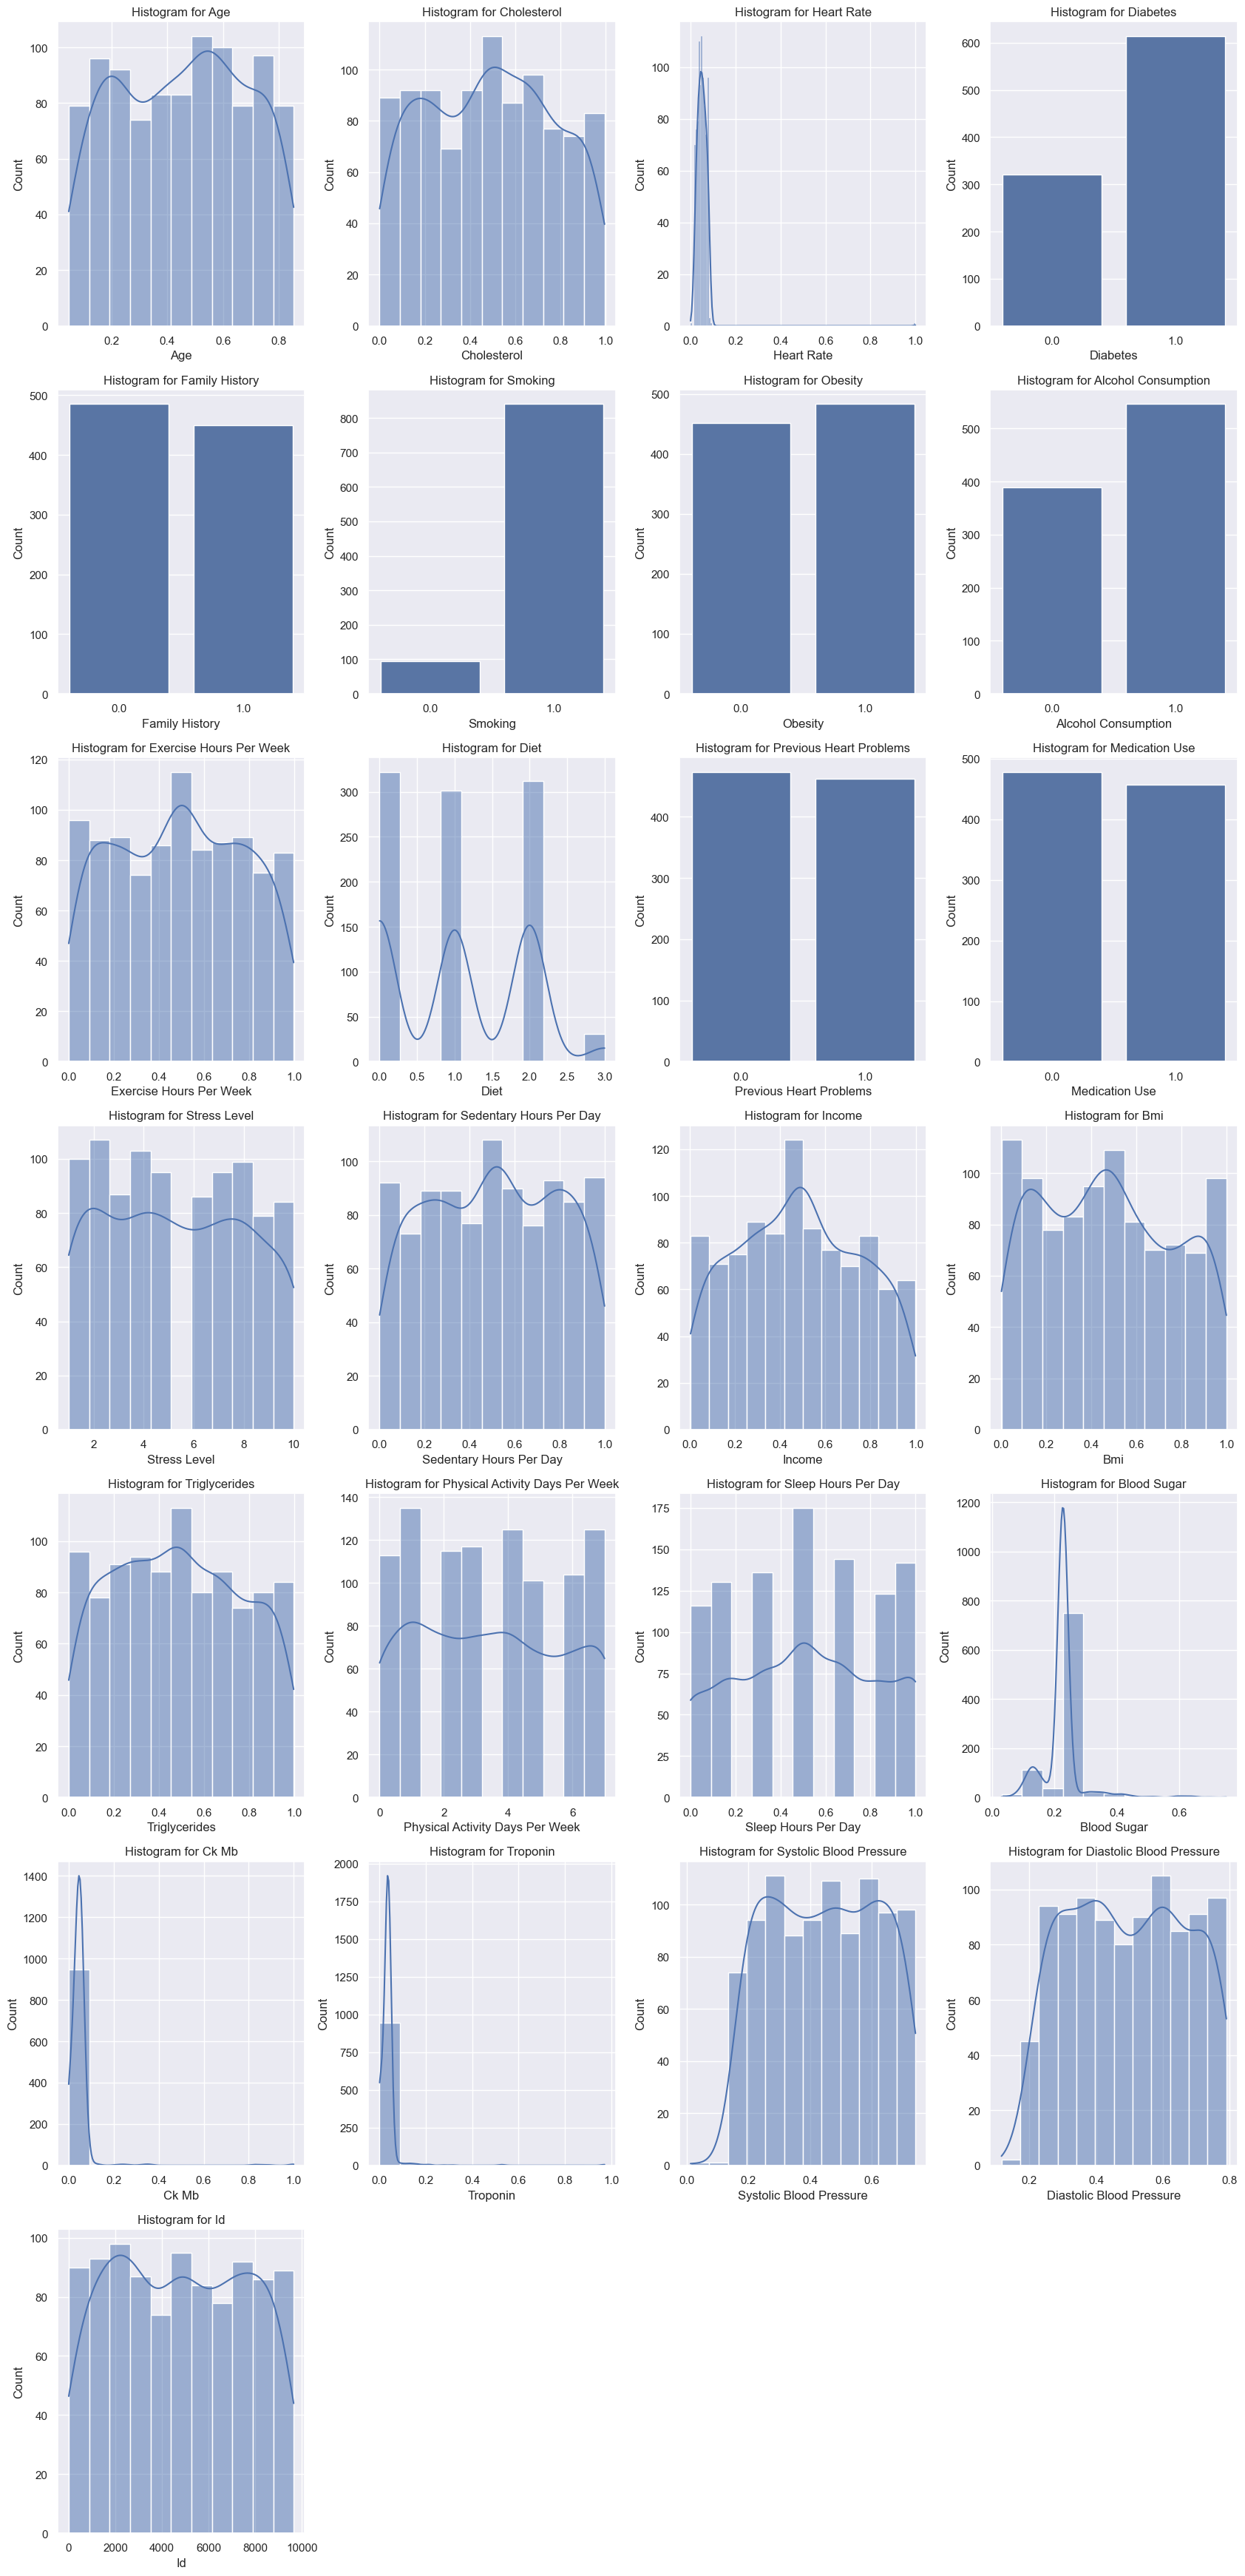


Описательная таблица с пропусками
Количество пропусков в столбце Diabetes: 31 

Количество пропусков в столбце Family History: 31 

Количество пропусков в столбце Smoking: 31 

Количество пропусков в столбце Obesity: 31 

Количество пропусков в столбце Alcohol Consumption: 31 

Количество пропусков в столбце Previous Heart Problems: 31 

Количество пропусков в столбце Medication Use: 31 

Количество пропусков в столбце Stress Level: 31 

Количество пропусков в столбце Physical Activity Days Per Week: 31 



In [16]:
describe_df(df_heart_test)

**Вывод по блоку**:
  
**Age**  
Возраст пациентов. Признак более равномерно распределён. Несколько больше сердечных приступов наблюдается в старших возрастных группах.

**Cholesterol**  
Уровень холестерина. Распределение в обеих группах схожее, но при повышенном холестерине чаще встречается высокий риск.

**Heart Rate**  
Частота сердечных сокращений. Распределение с пиками внизу, сердечные приступы могут быть связаны с экстремальными значениями.

**Diabetes**  
Наличие диабета (0/1). У пациентов с риском сердечного приступа немного больше встречается диабет.

**Family History**  
Наличие семейного анамнеза (0/1). Лица с семейной историей болезни чаще имеют высокий риск.

**Smoking**  
Курение (0/1). Среди курящих доля пациентов с риском сердечного приступа выше.

**Obesity**  
Ожирение (0/1). Признак бинарный, у людей с ожирением чаще встречается высокий риск.

**Alcohol Consumption**  
Потребление алкоголя (0/1). Выраженной тенденции не наблюдается, но среди пьющих чуть больше случаев высокого риска.

**Exercise Hours Per Week**  
Часы физических нагрузок в неделю. Более низкие значения часов коррелируют с повышенным риском.

**Diet**  
Стиль питания (качественный/категориальный). Диеты, вероятно, ранжируются, видно, что не все типы питания одинаково распространены в группе риска.

**Previous Heart Problems**  
Перенесённые ранее сердечные проблемы (0/1). Признак сильного влияния: у переболевших часто высокий риск.

**Medication Use**  
Использование лекарств (0/1). Аналогично: среди принимающих лекарства доля сердечных приступов выше.

**Stress Level**  
Уровень стресса. Распределение ближе к равномерному, видно лёгкое смещение в сторону более высокого риска при высоком стрессе.

**Sedentary Hours Per Day**  
Часы сидячего образа жизни. Повышенные значения чаще у группы риска.

**Income**  
Доход. Распределение равномерное, видимой связи с риском инфаркта особой нет.

**Bmi**  
Индекс массы тела. Более высокие значения чаще у людей с риском сердечного приступа.

**Triglycerides**  
Уровень триглицеридов. Повышенный уровень — ассоциирован с группой риска.

**Physical Activity Days Per Week**  
Дни физической активности. Больше дней — ниже риск; низкая физическая активность сопряжена с повышенным риском.

**Sleep Hours Per Day**  
Часы сна. Крайние значения чаще ассоциируются с риском.

**Heart Attack Risk Binary**  
Целевая переменная: бинарный показатель риска.

**Blood Sugar**  
Уровень сахара в крови. Высокие значения чаще у пациентов группы риска.

**CK Mb, Troponin**  
Кардиомаркеры — повышение этих показателей характерно для группы риска.

**Systolic/Diastolic Blood Pressure**  
Систолическое и диастолическое давление. Повышенное давление связано с большим риском.

- Наиболее значимыми факторами, коррелирующими с риском сердечного приступа, выглядят: возраст, семейная история, диабет, курение, ожирение, перенесённые ранее сердечные проблемы, плохая диета, снижение физической активности, низкое количество сна или его избыток, повышенный уровень холестерина, триглицеридов, сахара в крови, повышение артериального давления.
    - Также важны маркеры сердечной патологии (CK Mb, тропонин) - является утечкой данных
- Влияние дохода выражено менее явно.
- Больше всего бинарных признаков
- Большинство признаков из разряда образа жизни и биохимических маркеров тесно связано с риском инфаркта, что подтверждает медицинские данные.
- Регулярная физическая активность, оптимальный сон, отсутствие вредных привычек — сопутствуют низкому риску.

### 3.2 Корелляционный анализ

interval columns not set, guessing: ['age', 'cholesterol', 'heart_rate', 'diabetes', 'family_history', 'smoking', 'obesity', 'alcohol_consumption', 'exercise_hours_per_week', 'diet', 'previous_heart_problems', 'medication_use', 'stress_level', 'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides', 'physical_activity_days_per_week', 'sleep_hours_per_day', 'heart_attack_risk_binary', 'blood_sugar', 'ck_mb', 'troponin', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'id']


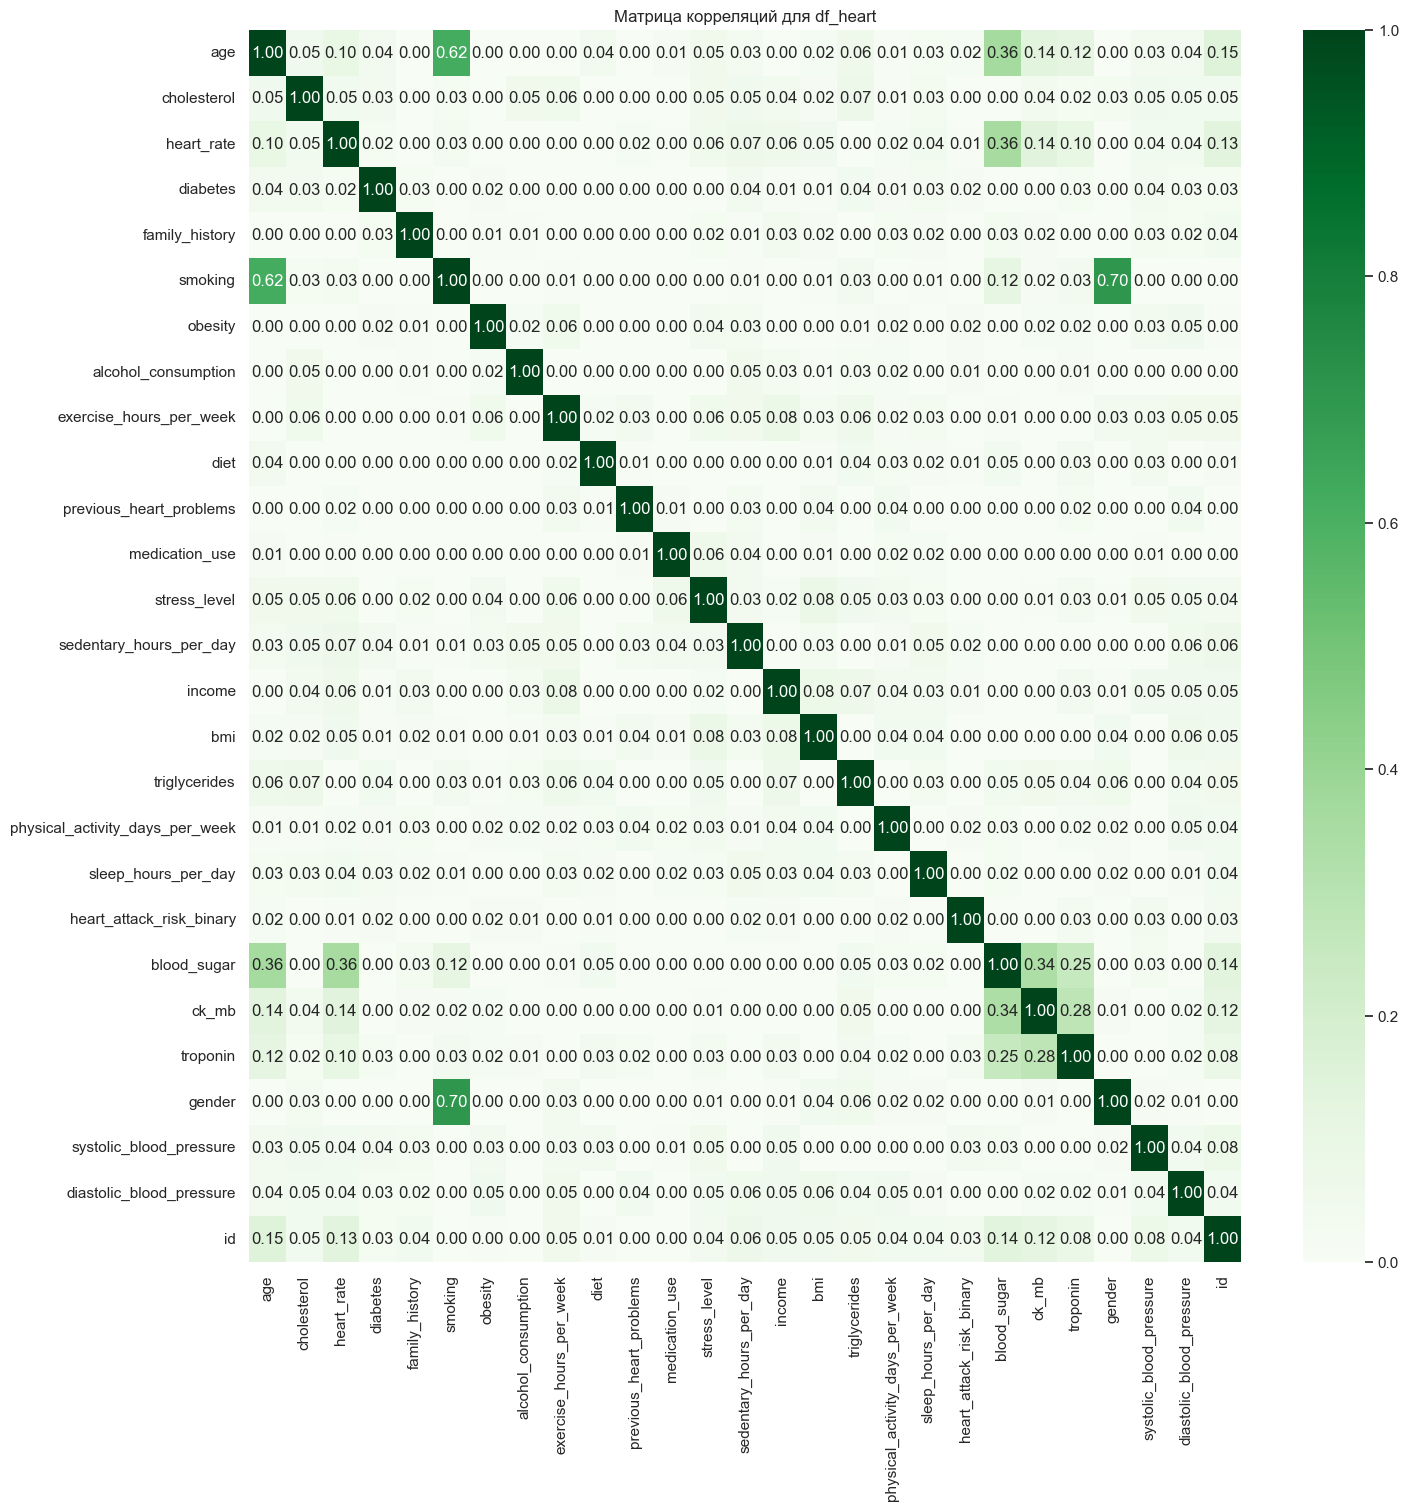

In [17]:
plt.figure(figsize = (16, 16))
sns.heatmap(df_heart.phik_matrix(), annot = True, fmt = '.2f', cmap = 'Greens' );
plt.title('Матрица корреляций для df_heart');

interval columns not set, guessing: ['age', 'cholesterol', 'heart_rate', 'diabetes', 'family_history', 'smoking', 'obesity', 'alcohol_consumption', 'exercise_hours_per_week', 'diet', 'previous_heart_problems', 'medication_use', 'stress_level', 'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides', 'physical_activity_days_per_week', 'sleep_hours_per_day', 'blood_sugar', 'ck_mb', 'troponin', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'id']


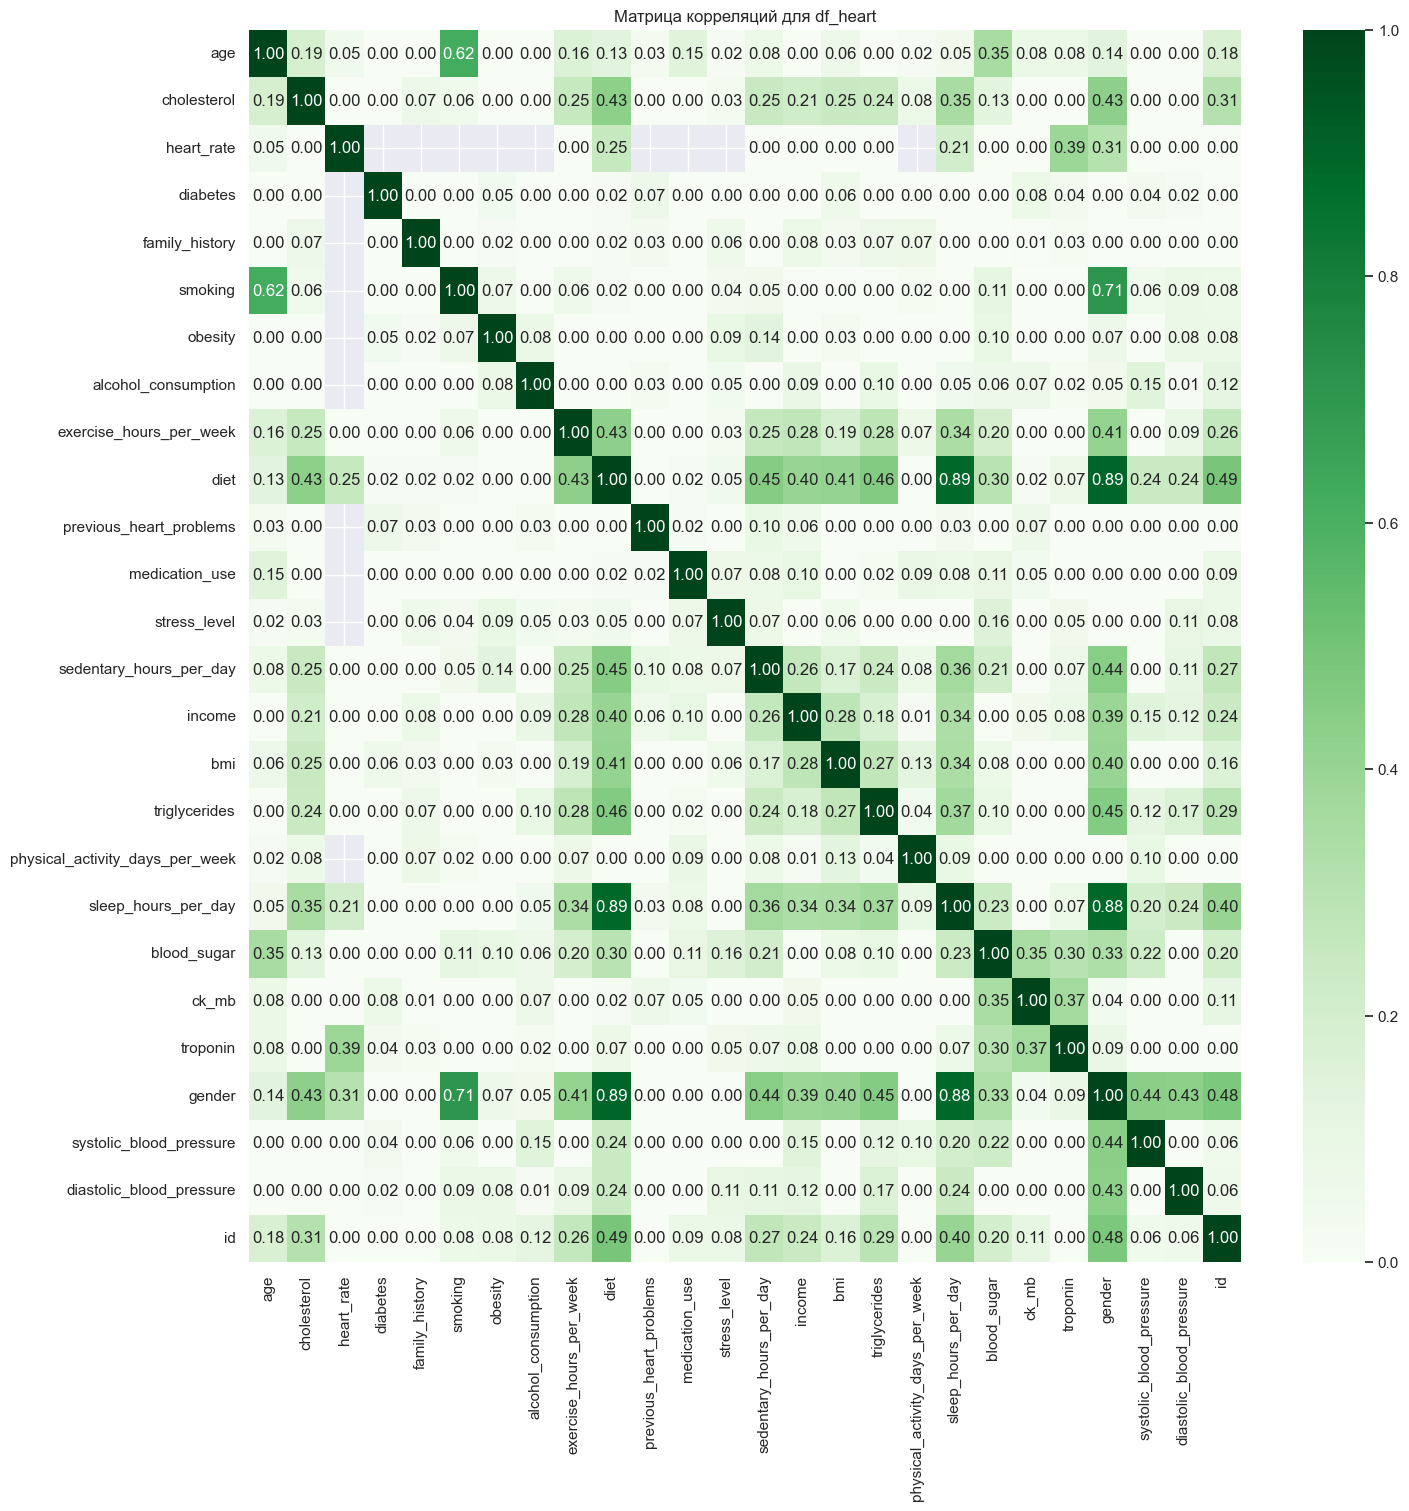

In [18]:
plt.figure(figsize = (16, 16))
sns.heatmap(df_heart_test.phik_matrix(), annot = True, fmt = '.2f', cmap = 'Greens' );
plt.title('Матрица корреляций для df_heart');

**Вывод по блоку:**
- `ck_mb, troponin` - ялвяются утечкой данных
- Анализ матриц корреляции для тренировочной и тестовой выборок показал их согласованность.
- Существенных зависимостей между входными признаками и целевой переменной не выявлено.
- Корреляция между входными признаками в целом низкая.

**Вывод по анализу:**

- Распределение данных в целом является сбалансированным и равномерным.  
- При сравнении распределений признаков в зависимости от целевой переменной статистически значимые различия не выявлены.  
- Между большинством признаков наблюдается слабая корреляционная связь, что говорит об их независимости.


Следующие переменные демонстрируют устойчивое распределение без резких перекосов и аномальных значений:

- `Stress Level` — уровень стресса  
- `Physical Activity Days Per Week` — количество дней физической активности в неделю  
- `Sleep Hours Per Day` — продолжительность сна в сутки  
- `Age` — возраст  
- `Cholesterol` — уровень холестерина  
- `Heart Rate` — частота сердечных сокращений  
- `Exercise Hours Per Week` — часы упражнений в неделю  
- `Sedentary Hours Per Day` — время в малоподвижном состоянии в день  
- `Income` — доход  
- `BMI` — индекс массы тела  
- `Triglycerides` — уровень триглицеридов  
- `Systolic Blood Pressure` — систолическое артериальное давление  
- `Diastolic Blood Pressure` — диастолическое артериальное давление

Наблюдаются значительные отклонения от нормального распределения:

- `Blood Sugar` — уровень глюкозы в крови  
- `CK-MB` — креатинкиназа MB-фракции  
- `Troponin` — кардиальный тропонин  

**Глюкоза в крови (`Blood Sugar`)**
- **Норма:** 3.3–5.5 ммоль/л (натощак)  
- **Критические значения:**  
  - Ниже 1.65 ммоль/л — риск тяжёлой гипогликемии  
  - Выше 33 ммоль/л — потенциально опасная гипергликемия  
- Повышенный уровень часто встречается после инфаркта миокарда, что может быть следствием стресс-гормональной реакции или нарушения метаболизма.

**КФК-МВ (`CK-MB`)**
- Фермент, локализованный преимущественно в клетках сердечной мышцы.  
- Повышение концентрации в крови указывает на повреждение миокарда.  
- Используется как один из маркеров инфаркта, хотя менее специфичен по сравнению с тропонином.

**Тропонин (`Troponin`)**
- Высокочувствительный и специфичный биомаркер повреждения сердечной мышцы.  
- В норме уровень близок к нулю.  
- Любое значимое повышение интерпретируется как признак некроза кардиомиоцитов, чаще всего — при остром инфаркте миокарда.

> 
> Переменные `CK-MB` и `Troponin` отражают **уже произошедшее** повреждение сердца, то есть фактически содержат информацию о целевом событии.  
> Их использование в модели предсказания инфаркта приведёт к **утечке данных**, что сделает модель искусственно точной, но неприменимой на практике.  
> **Решение:** эти признаки будут **удалены из обучающего и тестового наборов данных** перед построением моделей.


## 4 Создание модели

### 4.1 Подготовка данных

In [19]:
TEST_SIZE = 0.2
RANDOM_STATE = 42

In [20]:
X_train_df = df_heart.set_index('id').drop(['heart_attack_risk_binary', 'ck_mb', 'troponin'], axis = 1).copy() # В drop() Колонки, которые не будут участвовать в обучение модели
y_train_df = df_heart.set_index('id')['heart_attack_risk_binary'].copy()
X_test_df = df_heart_test.set_index('id').copy()

X_train, X_valid, y_train, y_valid = train_test_split(X_train_df, y_train_df, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y_train_df)

### 4.2 Создание Пайплайна

In [21]:
#категореальные признаки
ohe_columns = ['diabetes', 'family_history', 'smoking', 'obesity', 'alcohol_consumption', 'diet', 'medication_use', 'gender', 'previous_heart_problems']

# Количественные признаки
num_columns = ['age','cholesterol', 'heart_rate', 'exercise_hours_per_week', 'stress_level', 'sedentary_hours_per_day',
               'income', 'bmi', 'triglycerides', 'physical_activity_days_per_week', 'sleep_hours_per_day',
               'blood_sugar', 'systolic_blood_pressure', 'diastolic_blood_pressure']

In [22]:
def erorr_explainer(X):
    '''Функция для обработки ошибок'''
    X = X.copy()

    if 'gender' in X.columns:
        X['gender'] = X['gender'].astype(str).replace({'0.0': 'Female'}).replace({'1.0': 'Male'})

    return X

ohe_pipe = Pipeline(
    [
        ('FunctionTransformer_error', FunctionTransformer(erorr_explainer, feature_names_out='one-to-one')),
        ('simpleImputer_ohe', SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')),
        ('ohe', OneHotEncoder(drop = 'first', handle_unknown = 'ignore', sparse_output = False ))
    ]
)
ohe_pipe

Pipeline(steps=[('FunctionTransformer_error',
                 FunctionTransformer(feature_names_out='one-to-one',
                                     func=<function erorr_explainer at 0x000001E6AC62D440>)),
                ('simpleImputer_ohe', SimpleImputer(strategy='most_frequent')),
                ('ohe',
                 OneHotEncoder(drop='first', handle_unknown='ignore',
                               sparse_output=False))])

In [23]:
num_pipe = Pipeline(
    [
        ('simpleImputer_nu', SimpleImputer(missing_values = np.nan, strategy = 'median')),
        ('scaler', StandardScaler())
    ]
)
num_pipe

Pipeline(steps=[('simpleImputer_nu', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [24]:
preprocessor_pipe = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('num', num_pipe, num_columns)
    ],
    remainder = 'passthrough'
)
preprocessor_pipe

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('FunctionTransformer_error',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function erorr_explainer at 0x000001E6AC62D440>)),
                                                 ('simpleImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=Fals...
                                 Pipeline(steps=[('simpleImputer_nu',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'cholesterol', 'heart_rate',
                                  'exercise_hours_per_week', 'stress_level',
                                  'sedentary_hours_per_day', 'income', 'bmi',
                                  'triglycerides',
                                  'physical_activity_days_per_week',
                                  'sleep_hours_per_day', 'blood_sugar',
                                  'systolic_blood_pressure',
                                  'diastolic_blood_pressure'])])

In [25]:
final_pipe = Pipeline(
    [
        ('preprocessor_pipe', preprocessor_pipe),
        ('models', CatBoostClassifier(verbose=0, random_state=RANDOM_STATE))
    ]
)
final_pipe

Pipeline(steps=[('preprocessor_pipe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('FunctionTransformer_error',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function erorr_explainer at 0x000001E6AC62D440>)),
                                                                  ('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handl...
                                                                   StandardScaler())]),
                                                  ['age', 'cholesterol',
                                                   'heart_rate',
                                                   'exercise_hours_per_week',
                                                   'stress_level',
                                                   'sedentary_hours_per_day',
                                                   'income', 'bmi',
                                                   'triglycerides',
                                                   'physical_activity_days_per_week',
                                                   'sleep_hours_per_day',
                                                   'blood_sugar',
                                                   'systolic_blood_pressure',
                                                   'diastolic_blood_pressure'])])),
                ('models',
                 <catboost.core.CatBoostClassifier object at 0x000001E6A4B52120>)])

In [26]:
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 25),
        'models__max_features': range(2, 20),
        'preprocessor_pipe__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': [100, 200, 300],
        'models__max_depth': range(2, 25),
        'models__max_features': range(2, 20),
        'preprocessor_pipe__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    {
        'models': [XGBClassifier(
            random_state=RANDOM_STATE, n_estimators=400, eval_metric='logloss',
            tree_method='hist', n_jobs=-1
        )],
        'models__learning_rate': [0.03, 0.1],
        'models__max_depth': [4, 6, 8],
        'models__subsample': [0.8, 1.0],
        'models__colsample_bytree': [0.8, 1.0],
        'preprocessor_pipe__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    {
        'models': [CatBoostClassifier(
            random_state=RANDOM_STATE, verbose=0, iterations=800, loss_function='Logloss'
        )],
        'models__depth': [4, 6, 8],
        'models__verbose': [100], 
        'modesl__learning_rate': [0.03, 0.1],
        'preprocessor_pipe__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [27]:
random_grid = RandomizedSearchCV(
    final_pipe,
    param_grid,
    n_jobs = -1,
    cv = 5,
    scoring = 'roc_auc',
    random_state = RANDOM_STATE
)

In [28]:
random_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor_pipe',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('FunctionTransformer_error',
                                                                                                FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                    func=<function erorr_explainer at 0x000001E6AC62D440>)),
                                                                                               ('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe...
                                         'models__subsample': [0.8, 1.0],
                                         'preprocessor_pipe__num': [StandardScaler(),
                                                                    MinMaxScaler(),
                                                                    'passthrough']},
                                        {'models': [<catboost.core.CatBoostClassifier object at 0x000001E6AC60E0D0>],
                                         'models__depth': [4, 6, 8],
                                         'models__verbose': [100],
                                         'modesl__learning_rate': [0.03, 0.1],
                                         'preprocessor_pipe__num': [StandardScaler(),
                                                                    MinMaxScaler(),
                                                                    'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [29]:
print("Лучшая модель:", random_grid.best_estimator_['models'])

Лучшая модель: RandomForestClassifier(max_depth=17, max_features=13, random_state=42)


In [30]:
result_search = pd.DataFrame(random_grid.cv_results_)
print('Топ-10 лучших моделей после обучения')
result_search.sort_values(by='rank_test_score')[['rank_test_score', 'mean_test_score','params']].head(10)

Топ-10 лучших моделей после обучения


,rank_test_score,mean_test_score,params
1,1,0.573636,"{'preprocessor_pipe__num': MinMaxScaler(), 'models__n_estimators': 100, 'models__max_features': 13, 'models__max_depth': 17, 'models': RandomForestClassifier(random_state=42)}"
4,2,0.570313,"{'preprocessor_pipe__num': MinMaxScaler(), 'models__n_estimators': 300, 'models__max_features': 13, 'models__max_depth': 21, 'models': RandomForestClassifier(random_state=42)}"
5,3,0.570128,"{'preprocessor_pipe__num': StandardScaler(), 'models__n_estimators': 300, 'models__max_features': 12, 'models__max_depth': 15, 'models': RandomForestClassifier(random_state=42)}"
2,4,0.567715,"{'preprocessor_pipe__num': 'passthrough', 'models__n_estimators': 200, 'models__max_features': 9, 'models__max_depth': 13, 'models': RandomForestClassifier(random_state=42)}"
6,5,0.567535,"{'preprocessor_pipe__num': StandardScaler(), 'models__n_estimators': 200, 'models__max_features': 18, 'models__max_depth': 13, 'models': RandomForestClassifier(random_state=42)}"
7,6,0.564305,"{'preprocessor_pipe__num': StandardScaler(), 'models__n_estimators': 200, 'models__max_features': 8, 'models__max_depth': 12, 'models': RandomForestClassifier(random_state=42)}"
0,7,0.533899,"{'preprocessor_pipe__num': 'passthrough', 'models__max_features': 18, 'models__max_depth': 17, 'models': DecisionTreeClassifier(random_state=42)}"
3,8,0.515547,"{'preprocessor_pipe__num': MinMaxScaler(), 'models__max_features': 13, 'models__max_depth': 10, 'models': DecisionTreeClassifier(random_state=42)}"
9,9,0.511532,"{'preprocessor_pipe__num': 'passthrough', 'models__n_estimators': 100, 'models__max_features': 15, 'models__max_depth': 4, 'models': RandomForestClassifier(random_state=42)}"
8,10,0.489731,"{'preprocessor_pipe__num': MinMaxScaler(), 'models__max_features': 9, 'models__max_depth': 4, 'models': DecisionTreeClassifier(random_state=42)}"


### 4.3 Анализ модели

In [31]:
def logical_metircs(y_test, predictions, print_metric = True):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)

    if print_metric == True:
        print(f'Accuracy: {accuracy}')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1: {f1}')
        print(f'ROC-AUC: {roc_auc}')
        
    else:
        return accuracy, precision, recall, f1, roc_auc

def confus_matrix(y_test, predictions):
    
    logical_metircs(y_test, predictions)
    
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (10, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');
    plt.title('Матрица ошибок')
    plt.xlabel('Предсказание')
    plt.ylabel('Настоящие значения')
    plt.show()

In [32]:
best_model = random_grid.best_estimator_

y_proba = best_model.predict_proba(X_valid)[:, 1]
y_pred  = (y_proba >= 0.5).astype(int)

Accuracy: 0.6429840142095915
Precision: 0.0
Recall: 0.0
F1: 0.0
ROC-AUC: 0.5


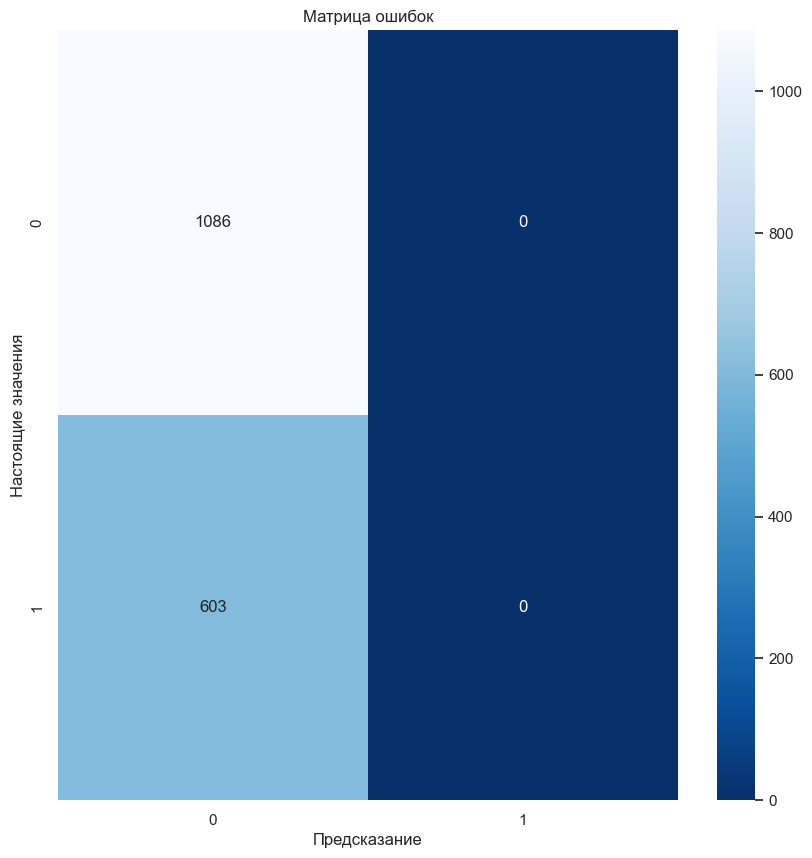

In [33]:
y_train_pred = (best_model.predict_proba(X_valid)[:, 1]).astype(int)
confus_matrix(y_valid, y_train_pred)

In [34]:
data = pd.DataFrame({
    'y_test' : y_valid,
    'predictions' : y_train_pred,
    'predictions_proba' : best_model.predict_proba(X_valid)[:, 1]
})

thresholds = [round(i,2) for i in np.linspace(0.01,1,num = 100,endpoint=False)]
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['predictions_proba'].apply(lambda x: 1 if x>= i else 0)
data.head()

,y_test,predictions,predictions_proba,y_pred_0.01,y_pred_0.02,y_pred_0.03,y_pred_0.04,y_pred_0.05,y_pred_0.06,y_pred_0.07,y_pred_0.08,y_pred_0.09,y_pred_0.1,y_pred_0.11,y_pred_0.12,y_pred_0.13,y_pred_0.14,y_pred_0.15,y_pred_0.16,y_pred_0.17,y_pred_0.18,y_pred_0.19,y_pred_0.2,y_pred_0.21,y_pred_0.22,y_pred_0.23,y_pred_0.24,y_pred_0.25,y_pred_0.26,y_pred_0.27,y_pred_0.28,y_pred_0.29,y_pred_0.3,y_pred_0.31,y_pred_0.32,y_pred_0.33,y_pred_0.34,y_pred_0.35,y_pred_0.36,y_pred_0.37,y_pred_0.38,y_pred_0.39,y_pred_0.4,y_pred_0.41,y_pred_0.42,y_pred_0.43,y_pred_0.44,y_pred_0.45,y_pred_0.46,y_pred_0.47,y_pred_0.48,y_pred_0.49,y_pred_0.5,y_pred_0.51,y_pred_0.52,y_pred_0.53,y_pred_0.54,y_pred_0.55,y_pred_0.56,y_pred_0.57,y_pred_0.58,y_pred_0.59,y_pred_0.6,y_pred_0.61,y_pred_0.62,y_pred_0.63,y_pred_0.64,y_pred_0.65,y_pred_0.66,y_pred_0.67,y_pred_0.68,y_pred_0.69,y_pred_0.7,y_pred_0.71,y_pred_0.72,y_pred_0.73,y_pred_0.74,y_pred_0.75,y_pred_0.76,y_pred_0.77,y_pred_0.78,y_pred_0.79,y_pred_0.8,y_pred_0.81,y_pred_0.82,y_pred_0.83,y_pred_0.84,y_pred_0.85,y_pred_0.86,y_pred_0.87,y_pred_0.88,y_pred_0.89,y_pred_0.9,y_pred_0.91,y_pred_0.92,y_pred_0.93,y_pred_0.94,y_pred_0.95,y_pred_0.96,y_pred_0.97,y_pred_0.98,y_pred_0.99
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4197,0.0,0,0.321107,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6072,0.0,0,0.142654,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2100,0.0,0,0.296245,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2230,0.0,0,0.393553,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5287,0.0,0,0.406051,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


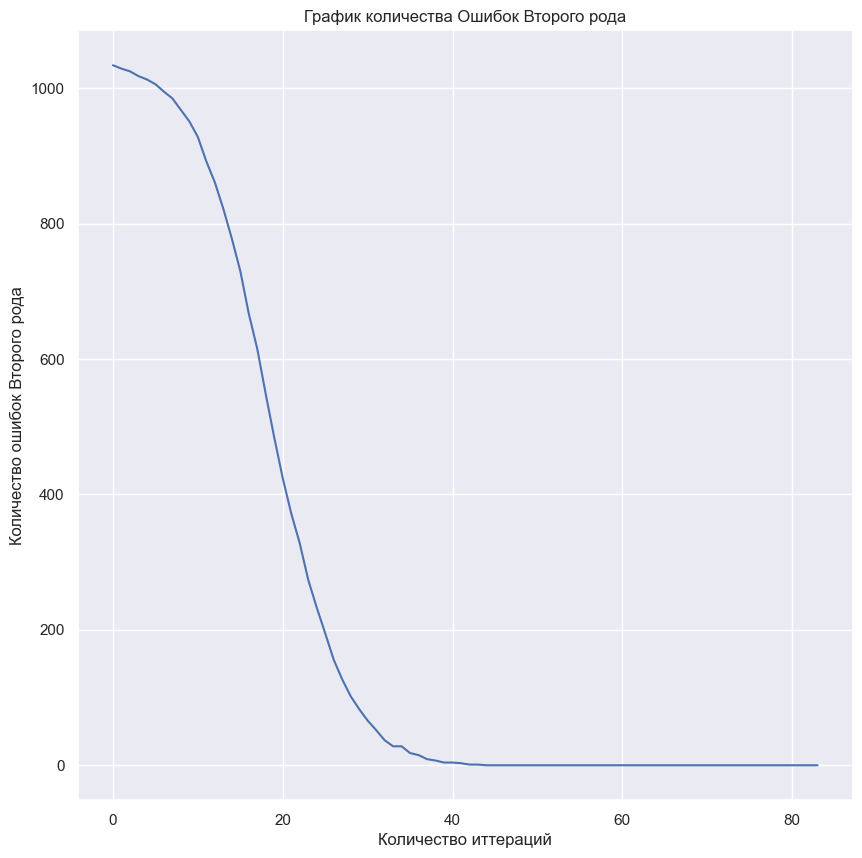

In [35]:
error = []
threshold = 0
for i in thresholds:
    if confusion_matrix(y_valid, data['y_pred_'+str(i)])[1, 0] != 0:
        error.append(confusion_matrix(y_valid, data['y_pred_'+str(i)])[0, 1])

plt.figure(figsize = (10, 10))
plt.plot(error);
plt.title('График количества Ошибок Второго рода')
plt.ylabel('Количество ошибок Второго рода');
plt.xlabel('Количество иттераций');

In [36]:
metric_list = []

for i in thresholds:
    metriс = logical_metircs(y_valid, data['y_pred_'+str(i)], print_metric = False)
    metric_list.append(metriс)
    
metric_frame = pd.DataFrame(data = metric_list, columns = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc' ])
metric_frame['threshold'] = [f"{x:.2f}" for x in thresholds]
metric_frame.set_index('threshold', inplace = True)

In [37]:
confus_list = []

for i in thresholds:
    confus = confusion_matrix(y_valid, data['y_pred_'+str(i)]).tolist()[0] + confusion_matrix(y_valid, data['y_pred_'+str(i)]).tolist()[1]
    confus_list.append(confus)
    
confus_frame = pd.DataFrame(data = confus_list, columns = ['TN', 'FP', 'FN', 'TP'])
confus_frame['threshold'] = [f"{x:.2f}" for x in thresholds]
confus_frame.set_index('threshold', inplace = True)

In [38]:
result = pd.concat([confus_frame, metric_frame], axis=1)
result.head()

,TN,FP,FN,TP,accuracy,precision,recall,f1,roc_auc
threshold,,,,,,,,,
0.01,0,1086,0,603,0.357016,0.357016,1.0,0.526178,0.50000
0.02,0,1086,0,603,0.357016,0.357016,1.0,0.526178,0.50000
0.03,0,1086,0,603,0.357016,0.357016,1.0,0.526178,0.50000
0.04,0,1086,0,603,0.357016,0.357016,1.0,0.526178,0.50000
0.05,1,1085,0,603,0.357608,0.357227,1.0,0.526408,0.50046


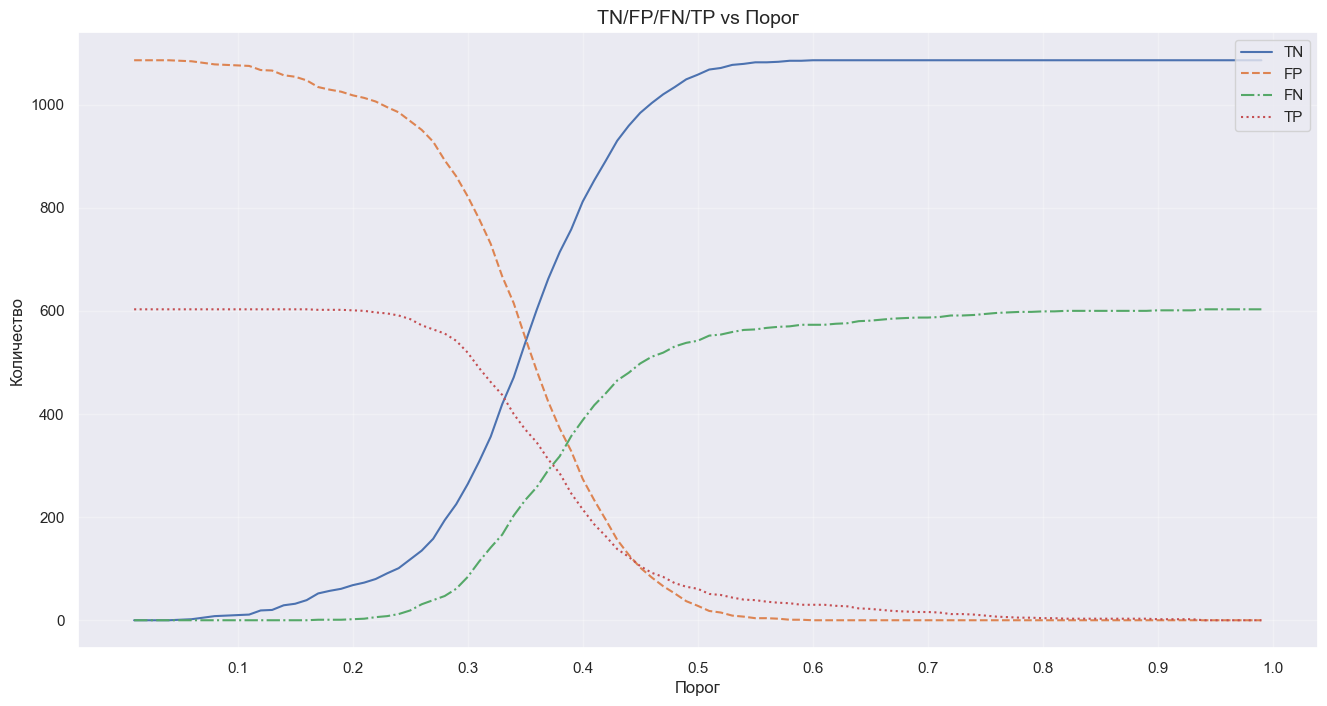

In [39]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=confus_frame, x=confus_frame.index.astype(float), y='TN', label='TN')
sns.lineplot(data=confus_frame, x=confus_frame.index.astype(float), y='FP', label='FP', linestyle='--')
sns.lineplot(data=confus_frame, x=confus_frame.index.astype(float), y='FN', label='FN', linestyle='-.')
sns.lineplot(data=confus_frame, x=confus_frame.index.astype(float), y='TP', label='TP', linestyle=':')

plt.title('TN/FP/FN/TP vs Порог', fontsize=14)
plt.xticks(np.arange(0.1, 1.1, 0.1))
plt.xlabel('Порог')
plt.ylabel('Количество')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [40]:
result.query('0.7 < recall < 0.9')

,TN,FP,FN,TP,accuracy,precision,recall,f1,roc_auc
threshold,,,,,,,,,
0.29,225,861,61,542,0.454115,0.386315,0.898839,0.540379,0.553011
0.30,264,822,84,519,0.463588,0.387025,0.860697,0.533951,0.551895
0.31,308,778,114,489,0.471877,0.385951,0.810945,0.522995,0.547277
0.32,356,730,141,462,0.484310,0.387584,0.766169,0.514763,0.546989
0.33,419,667,166,437,0.506809,0.395833,0.724710,0.512009,0.555265


Accuracy: 0.4689165186500888
Precision: 0.38726993865030673
Recall: 0.8374792703150912
F1: 0.529627687467226
ROC-AUC: 0.5508759150838808


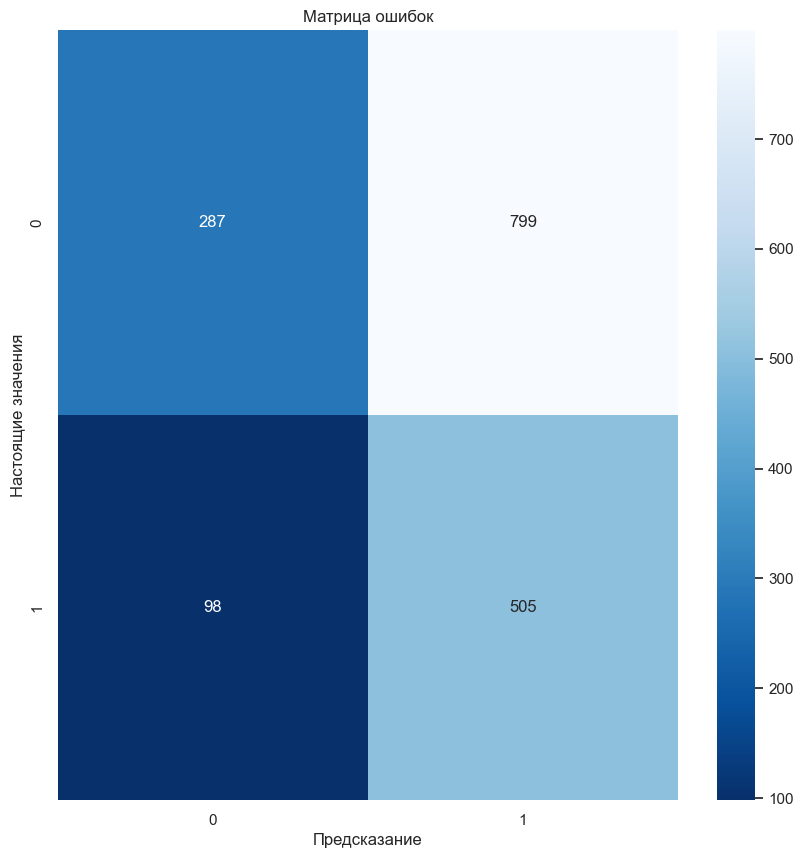

In [41]:
y_train_pred = (best_model.predict_proba(X_valid)[:, 1] >= 0.3051).astype(int)
confus_matrix(y_valid, y_train_pred)

In [42]:
test_predict = pd.DataFrame(data = { 'id': df_heart_test['id'], 'predict' :(best_model.predict_proba(df_heart_test)[:, 1] >= 0.3051).astype(int)})
test_predict.to_csv('test_predict_03051.csv', index=True)
print("Сохранено: test_predict_03051.csv")

Сохранено: test_predict_03051.csv


In [43]:

model = best_model
threshold = 0.3051

to_save = {
    'model': best_model,
    'threshold': threshold
}

joblib.dump(to_save, 'heart_model_threshold.pkl')
joblib.dump(list(X_train.columns), "best_model_feature_list.pkl")


['best_model_feature_list.pkl']

## Общий вывод

Распределение данных в целом является сбалансированным и равномерным.  
При сравнении распределений признаков в зависимости от целевой переменной статистически значимые различия не выявлены.  
Между большинством признаков наблюдается слабая корреляционная связь, что говорит об их независимости.

Следующие переменные демонстрируют устойчивое распределение без резких перекосов и аномальных значений:  
- `Stress Level` — уровень стресса  
- `Physical Activity Days Per Week` — количество дней физической активности в неделю  
- `Sleep Hours Per Day` — продолжительность сна в сутки  
- `Age` — возраст  
- `Cholesterol` — уровень холестерина  
- `Heart Rate` — частота сердечных сокращений  
- `Exercise Hours Per Week` — часы упражнений в неделю  
- `Sedentary Hours Per Day` — время в малоподвижном состоянии в день  
- `Income` — доход  
- `BMI` — индекс массы тела  
- `Triglycerides` — уровень триглицеридов  
- `Systolic Blood Pressure` — систолическое артериальное давление  
- `Diastolic Blood Pressure` — диастолическое артериальное давление

Наблюдаются значительные отклонения от нормального распределения:  
- `Blood Sugar` — уровень глюкозы в крови  
- `CK-MB` — креатинкиназа MB-фракции  
- `Troponin` — кардиальный тропонин  

**Глюкоза в крови (`Blood Sugar`)**  
- **Норма:** 3.3–5.5 ммоль/л (натощак)  
- **Критические значения:**  
  - Ниже 1.65 ммоль/л — риск тяжёлой гипогликемии  
  - Выше 33 ммоль/л — потенциально опасная гипергликемия  
- Повышенный уровень часто встречается после инфаркта миокарда, что может быть следствием стресс-гормональной реакции или нарушения метаболизма.

**КФК-МВ (`CK-MB`)**  
- Фермент, локализованный преимущественно в клетках сердечной мышцы.  
- Повышение концентрации в крови указывает на повреждение миокарда.  
- Используется как один из маркеров инфаркта, хотя менее специфичен по сравнению с тропонином.

**Тропонин (`Troponin`)**  
- Высокочувствительный и специфичный биомаркер повреждения сердечной мышцы.  
- В норме уровень близок к нулю.  
- Любое значимое повышение интерпретируется как признак некроза кардиомиоцитов, чаще всего — при остром инфаркте миокарда.

Переменные `CK-MB` и `Troponin` отражают **уже произошедшее** повреждение сердца, то есть фактически содержат информацию о целевом событии.  
Их использование в модели предсказания инфаркта приведёт к **утечке данных**, что сделает модель искусственно точной, но неприменимой на практике.  
**Решение:** эти признаки будут **удалены из обучающего и тестового наборов данных** перед построением моделей.

На основе анализа метрик и визуализации поведения модели при изменении порога принятия решения были получены следующие результаты:

- **Accuracy = 0.469** — значение ниже 0.5, что указывает на низкую общую эффективность модели, особенно на фоне дисбаланса классов.
- **Recall = 0.837** — модель способна выявить около 84% пациентов с риском инфаркта, что является высоким показателем и критически важным для медицинских приложений, где важно не пропустить больного.
- **Precision = 0.387** — из всех пациентов, которым модель присвоила высокий риск, только 38.7% действительно находятся в группе риска. Это говорит о большом количестве ложных срабатываний.
- **F1-score = 0.529** — умеренное значение, отражающее компромисс между полнотой и точностью.
- **ROC-AUC = 0.551** — модель слабо отличается от случайного угадывания, но всё же демонстрирует минимальную предсказательную способность.

График зависимости TN, FP, FN, TP от порога показывает, что:
- При низких порогах (0.1–0.3) модель активно помечает пациентов как "в группе риска", что приводит к высокому числу ложных срабатываний (FP), но при этом эффективно находит подавляющее большинство истинных случаев (TP).
- При увеличении порога выше 0.4 FP снижаются, но растёт число пропущенных случаев (FN), что повышает риск упустить пациента с реальным риском.
- Оптимальный баланс между Recall и Precision достигается при пороге около **0.35**.

Матрица ошибок подтверждает:
- **TN = 287** — правильно определено 287 здоровых пациентов
- **FP = 799** — 799 пациентов ошибочно признаны находящимися в группе риска
- **FN = 98** — 98 пациентов с риском были пропущены
- **TP = 505** — 505 пациентов с риском были корректно выявлены

Высокое значение FP указывает на то, что модель склонна к избыточной чувствительности, что может быть допустимо в скрининговых системах, но требует последующей фильтрации или подтверждения врачом.

После очистки данных и удаления признаков `CK-MB` и `Troponin` модель была обучена и протестирована. Для сохранения возможности повторного использования модель была сериализована и сохранена с помощью библиотеки `joblib`:

```python
import joblib
joblib.dump(model, 'heart_risk_model.pkl')